In [261]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import math

In [262]:
# load dict from json file
performance_averages = {}
train_times = {}
pred_times = {}
model_sizes = {}
with open('performance_averages.json', 'r') as f:
    performance_averages = json.load(f)

with open('dcase_train.json', 'r') as f:
    train_times = json.load(f)

with open('dcase_pred.json', 'r') as f:
    pred_times = json.load(f)

with open('dcase_model_sizes.json', 'r') as f:
    model_sizes = json.load(f)

In [263]:
nasa_performance_averages = {}
nasa_train_times = {}
nasa_pred_times = {}
nasa_model_sizes = {}

with open('nasa_performance_averages.json', 'r') as f:
    nasa_performance_averages = json.load(f)

with open('nasa_train.json', 'r') as f:
    nasa_train_times = json.load(f)

with open('nasa_pred.json', 'r') as f:
    nasa_pred_times = json.load(f)

with open('nasa_model_sizes.json', 'r') as f:
    nasa_model_sizes = json.load(f)

In [264]:
data_link_speed_upload = 20
data_link_speed_download = 100
deployment_time = 1.253

In [265]:
def calc_effective_accuracy(accuracy, model_size, train_time, pred_time, data_link_speed_upload, data_link_speed_download, t_time_now, _lambda):
    # parse model size from bytes to megabytes
    model_size_mb = model_size / 1024 / 1024
    upload_time = model_size_mb / data_link_speed_upload
    download_time = model_size_mb / data_link_speed_download

    # how to calculate exponential of x

    af = accuracy * math.exp(-_lambda * (t_time_now % (upload_time + download_time + train_time + pred_time + deployment_time)))
    return af



In [266]:
af_mels_dnn = {}
af_mfcc_dnn = {}
af_ecae1 = {}
af_ecae2 = {}
af_race1 = {}
af_race2 = {}


# nasa_af_lstm = {}
# nasa_af_ecae1 = {}
# nasa_af_ecae2 = {}
# nasa_af_race1 = {}
# nasa_af_race2 = {}

nasa_af_lstm = []
nasa_af_ecae1 = []
nasa_af_ecae2 = []
nasa_af_race1 = []
nasa_af_race2 = []


In [267]:
time_interval = np.arange(0, 10800, 1) # 3 hours in seconds
time_interval_nasa = np.arange(0, 10800/4, 1) # 3 hours in seconds
assets = performance_averages.keys()
settings = ["S1", "S2", "S3", "S4"]
_lamda = 0.0001
_lamda_nasa = 0.0001

In [268]:
nasa_performance_averages["S1"].keys()

dict_keys(['lstm_gpu', 'ecae_1layers', 'ecae_2layers', 'race_step2_1layers', 'race_step2_2layers'])

In [269]:
for t_instant in time_interval:
    for asset in assets:

        if asset not in af_mels_dnn:
            af_mels_dnn[asset] = []
            af_mfcc_dnn[asset] = []
            af_ecae1[asset] = []
            af_ecae2[asset] = []
            af_race1[asset] = []
            af_race2[asset] = []

        
        af_mels_dnn[asset].append(calc_effective_accuracy(performance_averages[asset]["AENet Mel"], model_sizes[asset]["AENet Mel"], train_times[asset]["AENet Mel"], pred_times[asset]["AENet Mel"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        af_mfcc_dnn[asset].append(calc_effective_accuracy(performance_averages[asset]["AENet MFCC"], model_sizes[asset]["AENet MFCC"], train_times[asset]["AENet MFCC"], pred_times[asset]["AENet MFCC"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        af_ecae1[asset].append(calc_effective_accuracy(performance_averages[asset]["E-CAE RC 1 RC"], model_sizes[asset]["E-CAE RC 1 RC"], train_times[asset]["E-CAE RC 1 RC"], pred_times[asset]["E-CAE RC 1 RC"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        af_ecae2[asset].append(calc_effective_accuracy(performance_averages[asset]["E-CAE RC 2 RC"], model_sizes[asset]["E-CAE RC 2 RC"], train_times[asset]["E-CAE RC 2 RC"], pred_times[asset]["E-CAE RC 2 RC"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        af_race1[asset].append(calc_effective_accuracy(performance_averages[asset]["RACE-DT Hps Round 2 1 RC"], model_sizes[asset]["RACE-DT Hps Round 2 1 RC"], train_times[asset]["RACE-DT Hps Round 2 1 RC"], pred_times[asset]["RACE-DT Hps Round 2 1 RC"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        af_race2[asset].append(calc_effective_accuracy(performance_averages[asset]["RACE-DT Hps Round 2 2 RC"], model_sizes[asset]["RACE-DT Hps Round 2 2 RC"], train_times[asset]["RACE-DT Hps Round 2 2 RC"], pred_times[asset]["RACE-DT Hps Round 2 2 RC"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda))
        
    

In [270]:
for index, setting in enumerate(settings):
    for t_instant in time_interval_nasa:
            
        actual_time = t_instant * (index + 1)  # Simulate different time intervals for each setting
        # for setting in settings:
        #     if setting not in nasa_af_lstm:
        #         nasa_af_lstm[setting] = []
        #         nasa_af_ecae1[setting] = []
        #         nasa_af_ecae2[setting] = []
        #         nasa_af_race1[setting] = []
        #         nasa_af_race2[setting] = []

        #     nasa_af_lstm[setting].append(calc_effective_accuracy(nasa_performance_averages[setting]["lstm_gpu"], nasa_model_sizes[setting]["DeepLSTM"], nasa_train_times[setting]["lstm_gpu"], nasa_pred_times[setting]["lstm_gpu"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda_nasa))
        #     nasa_af_ecae1[setting].append(calc_effective_accuracy(nasa_performance_averages[setting]["ecae_1layers"], nasa_model_sizes[setting]["E-CAE RC 1 RC"], nasa_train_times[setting]["ecae_1layers_mlp"] + nasa_train_times[setting]["ecae_1layers_ae"], nasa_pred_times[setting]["ecae_1layers_mlp"] + nasa_pred_times[setting]["ecae_1layers_ae"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda_nasa))
        #     nasa_af_ecae2[setting].append(calc_effective_accuracy(nasa_performance_averages[setting]["ecae_2layers"], nasa_model_sizes[setting]["E-CAE RC 2 RC"], nasa_train_times[setting]["ecae_2layers_mlp"] + nasa_train_times[setting]["ecae_2layers_ae"], nasa_pred_times[setting]["ecae_2layers_mlp"] + nasa_pred_times[setting]["ecae_2layers_ae"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda_nasa))
        #     nasa_af_race1[setting].append(calc_effective_accuracy(nasa_performance_averages[setting]["race_step2_1layers"], nasa_model_sizes[setting]["RACE-DT Hps Round 2 1 RC"], nasa_train_times[setting]["race_step2_1layers"], nasa_pred_times[setting]["race_step2_1layers"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda_nasa))
        #     nasa_af_race2[setting].append(calc_effective_accuracy(nasa_performance_averages[setting]["race_step2_2layers"], nasa_model_sizes[setting]["RACE-DT Hps Round 2 2 RC"], nasa_train_times[setting]["race_step2_2layers"], nasa_pred_times[setting]["race_step2_2layers"], data_link_speed_upload, data_link_speed_download, t_instant, _lamda_nasa))
        nasa_af_lstm.append(calc_effective_accuracy(nasa_performance_averages[setting]["lstm_gpu"], nasa_model_sizes[setting]["DeepLSTM"], nasa_train_times[setting]["lstm_gpu"], nasa_pred_times[setting]["lstm_gpu"], data_link_speed_upload, data_link_speed_download, actual_time, _lamda_nasa))
        nasa_af_ecae1.append(calc_effective_accuracy(nasa_performance_averages[setting]["ecae_1layers"], nasa_model_sizes[setting]["E-CAE RC 1 RC"], nasa_train_times[setting]["ecae_1layers_mlp"] + nasa_train_times[setting]["ecae_1layers_ae"], nasa_pred_times[setting]["ecae_1layers_mlp"] + nasa_pred_times[setting]["ecae_1layers_ae"], data_link_speed_upload, data_link_speed_download, actual_time, _lamda_nasa))
        nasa_af_ecae2.append(calc_effective_accuracy(nasa_performance_averages[setting]["ecae_2layers"], nasa_model_sizes[setting]["E-CAE RC 2 RC"], nasa_train_times[setting]["ecae_2layers_mlp"] + nasa_train_times[setting]["ecae_2layers_ae"], nasa_pred_times[setting]["ecae_2layers_mlp"] + nasa_pred_times[setting]["ecae_2layers_ae"], data_link_speed_upload, data_link_speed_download, actual_time, _lamda_nasa))
        nasa_af_race1.append(calc_effective_accuracy(nasa_performance_averages[setting]["race_step2_1layers"], nasa_model_sizes[setting]["RACE-DT Hps Round 2 1 RC"], nasa_train_times[setting]["race_step2_1layers"], nasa_pred_times[setting]["race_step2_1layers"], data_link_speed_upload, data_link_speed_download, actual_time, _lamda_nasa))
        nasa_af_race2.append(calc_effective_accuracy(nasa_performance_averages[setting]["race_step2_2layers"], nasa_model_sizes[setting]["RACE-DT Hps Round 2 2 RC"], nasa_train_times[setting]["race_step2_2layers"], nasa_pred_times[setting]["race_step2_2layers"], data_link_speed_upload, data_link_speed_download, actual_time, _lamda_nasa))

In [271]:
nasa_af_lstm

[0.768,
 0.767923203839872,
 0.7678464153589761,
 0.7677696345565443,
 0.7676928614318088,
 0.767616095984002,
 0.7675393382123562,
 0.7674625881161037,
 0.7673858456944771,
 0.7673091109467091,
 0.7672323838720321,
 0.7671556644696789,
 0.7670789527388824,
 0.7670022486788753,
 0.7669255522888909,
 0.766848863568162,
 0.7667721825159217,
 0.7666955091314032,
 0.7666188434138399,
 0.7665421853624649,
 0.7664655349765118,
 0.7663888922552141,
 0.7663122571978054,
 0.7662356298035191,
 0.7661590100715893,
 0.7660823980012493,
 0.7660057935917336,
 0.7659291968422757,
 0.7658526077521098,
 0.7657760263204699,
 0.7656994525465904,
 0.7656228864297054,
 0.7655463279690493,
 0.7654697771638564,
 0.7653932340133615,
 0.7653166985167986,
 0.7652401706734029,
 0.7651636504824089,
 0.7650871379430514,
 0.7650106330545653,
 0.7649341358161855,
 0.764857646227147,
 0.7647811642866851,
 0.7647046899940348,
 0.7646282233484314,
 0.7645517643491102,
 0.7644753129953067,
 0.7643988692862563,
 0.764322

In [272]:
af_mels_dnn_weak_link = []
af_mfcc_dnn_weak_link = []
af_ecae1_weak_link = []
af_ecae2_weak_link = []
af_race1_weak_link = []
af_race2_weak_link = []


nasa_af_lstm_weak_link = []
nasa_af_ecae1_weak_link = []
nasa_af_ecae2_weak_link = []
nasa_af_race1_weak_link = []
nasa_af_race2_weak_link = []


In [273]:
for t_instant in time_interval:
        af_mels_dnn_weak_link.append(min([ af_mels_dnn[a][t_instant] for a in af_mels_dnn.keys() ]))
        af_mfcc_dnn_weak_link.append(min([ af_mfcc_dnn[a][t_instant] for a in af_mfcc_dnn.keys() ]))
        af_ecae1_weak_link.append(min([ af_ecae1[a][t_instant] for a in af_ecae1.keys() ]))
        af_ecae2_weak_link.append(min([ af_ecae2[a][t_instant] for a in af_ecae2.keys() ]))
        af_race1_weak_link.append(min([ af_race1[a][t_instant] for a in af_race1.keys() ]))
        af_race2_weak_link.append(min([ af_race2[a][t_instant] for a in af_race2.keys() ]))

        # nasa_af_lstm_weak_link.append(min([ nasa_af_lstm[a][t_instant] for a in nasa_af_lstm.keys() ]))
        # nasa_af_ecae1_weak_link.append(min([ nasa_af_ecae1[a][t_instant] for a in nasa_af_ecae1.keys() ]))
        # nasa_af_ecae2_weak_link.append(min([ nasa_af_ecae2[a][t_instant] for a in nasa_af_ecae2.keys() ]))
        # nasa_af_race1_weak_link.append(min([ nasa_af_race1[a][t_instant] for a in nasa_af_race1.keys() ]))
        # nasa_af_race2_weak_link.append(min([ nasa_af_race2[a][t_instant] for a in nasa_af_race2.keys() ]))

In [274]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
plt.style.use('/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False

colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']

markers = [
    "o",
    "s",
    "D",
    "v",
    "x",
    "P"
]

findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

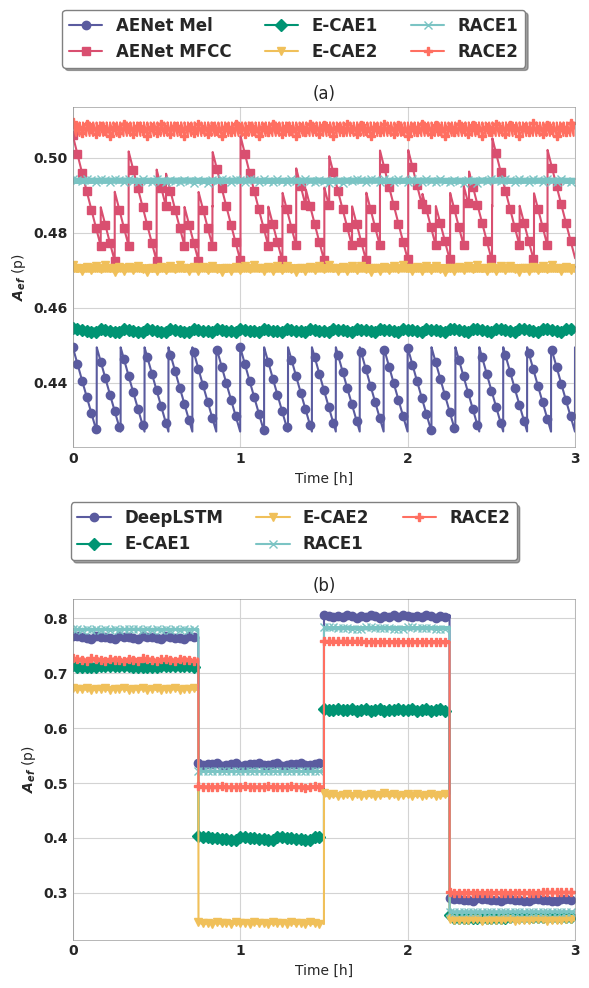

In [284]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10))  # 1 row, 2 columns

# First subplot: Effective Accuracy Over Time
axes[0].plot(time_interval, af_mels_dnn_weak_link, label='AENet Mel', color=colors[0], marker=markers[0], markevery=100)
axes[0].plot(time_interval, af_mfcc_dnn_weak_link, label='AENet MFCC', color=colors[1], marker=markers[1], markevery=100)
axes[0].plot(time_interval, af_ecae1_weak_link, label='E-CAE1', color=colors[2], marker=markers[2], markevery=100)
axes[0].plot(time_interval, af_ecae2_weak_link, label='E-CAE2', color=colors[3], marker=markers[3], markevery=100)
axes[0].plot(time_interval, af_race1_weak_link, label="RACE1", color=colors[4], marker=markers[4], markevery=100)
axes[0].plot(time_interval, af_race2_weak_link, label="RACE2", color=colors[5], marker=markers[5], markevery=100)
axes[0].set_title('(a)')
axes[0].set_xlabel('Time [h]')
axes[0].set_ylabel('$A_{ef}$ (p)')
axes[0].legend(loc='center', bbox_to_anchor=(0.44, 1.2), fancybox=True, shadow=True, ncol=3, fontsize=12)
axes[0].set_xlim(0, 3.05)  # Set y-axis limits to [0, 1.05]


# set x axis to hours
axes[0].set_xticks(np.arange(0, 10801, 3600))
axes[0].set_xticklabels([f'{int(x/3600)}' for x in np.arange(0, 10801, 3600)])

# # Second subplot: Empty for now
# axes[1].set_title('To be added')
# axes[1].axis('off')  # Optional: hides axes for now

# First subplot: Effective Accuracy Over Time
axes[1].plot(time_interval, nasa_af_lstm, label='DeepLSTM', color=colors[0], marker=markers[0], markevery=100)
axes[1].plot(time_interval, nasa_af_ecae1, label='E-CAE1', color=colors[2], marker=markers[2], markevery=100)
axes[1].plot(time_interval, nasa_af_ecae2, label='E-CAE2', color=colors[3], marker=markers[3], markevery=100)
axes[1].plot(time_interval, nasa_af_race1, label="RACE1", color=colors[4], marker=markers[4], markevery=100)
axes[1].plot(time_interval, nasa_af_race2, label="RACE2", color=colors[5], marker=markers[5], markevery=100)
axes[1].set_title('(b)')
axes[1].set_xlabel('Time [h]')
axes[1].set_ylabel('$A_{ef}$ (p)')
axes[1].legend(loc='center', bbox_to_anchor=(0.44, 1.2), fancybox=True, shadow=True, ncol=3, fontsize=12)
axes[1].set_xlim(0, 3.05)  # Set y-axis limits to [0, 1.05]



# set x axis to hours
axes[1].set_xticks(np.arange(0, 10801, 3600))
axes[1].set_xticklabels([f'{int(x/3600)}' for x in np.arange(0, 10801, 3600)])

plt.tight_layout()
# Save the figure to pdf
plt.savefig('effective_accuracy_over_time.pdf', bbox_inches='tight')
plt.show()

In [288]:
# integral
from scipy.integrate import simps

print("AENet MFCC Weak Link Integral:", simps(af_mfcc_dnn_weak_link, dx=1))
print("nasa_af_race2 Weak Link Integral:", simps(nasa_af_race2, dx=1))
print("ratio:", simps(nasa_af_race2, dx=1) / simps(af_mfcc_dnn_weak_link, dx=1))

AENet MFCC Weak Link Integral: 5247.99996975968
nasa_af_race2 Weak Link Integral: 6138.943431006032
ratio: 1.169768191002324
